<a href="https://colab.research.google.com/github/gaca-ai/easy_visa/blob/main/GACA_EasyVisaProject_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [86]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# **Loading the dataset**

In [88]:
url = "https://raw.githubusercontent.com/gaca-ai/easy_visa/main/data/EasyVisa.csv"
df = pd.read_csv(url)



# **Overview of the Dataset**

* Observations

* Sanity checks

## Head and Tail analisys

In [89]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [90]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Shape Analisys

In [91]:
row_number, features_number = df.shape
print(f"The dataset has {row_number} rows and {features_number} features")

The dataset has 25480 rows and 12 features


## Columns dtypes and null rows

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The majority of the features are object dtypes (9 out of 12)

In [93]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols



Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

Let's analyze whether there are any unexpected category or typo errors in these object features:

In [94]:
for col in obj_cols[1:]:
    print("-"*50)
    print(f"{col}: \n{df[col].unique()}\n")

--------------------------------------------------
continent: 
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']

--------------------------------------------------
education_of_employee: 
['High School' "Master's" "Bachelor's" 'Doctorate']

--------------------------------------------------
has_job_experience: 
['N' 'Y']

--------------------------------------------------
requires_job_training: 
['N' 'Y']

--------------------------------------------------
region_of_employment: 
['West' 'Northeast' 'South' 'Midwest' 'Island']

--------------------------------------------------
unit_of_wage: 
['Hour' 'Year' 'Week' 'Month']

--------------------------------------------------
full_time_position: 
['Y' 'N']

--------------------------------------------------
case_status: 
['Denied' 'Certified']



The "Island" category represents employment locations outside the continental United States, such as Hawaii, Puerto Rico, or other U.S. territories.

So, apparently, so far there are no issues in the data that need to be corrected.

Now, let's analyze the numerical features:

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [96]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## Observations:
* There are no null values in the dataset
* The majority of the features are of `object` type. They should be converted to categorical to optimize memory usage.
* Apparently, `no_of_employees` has extreme values, as the maximum exceeds 600k employees and minimun is negative (-26).

In [97]:
for col in obj_cols[1:]:
    df[col] = df[col].astype('category')


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2), object(1)
memory usage: 996.7+ KB


Converting object-type features to categorical reduced memory usage from over 2.3 MB to about 996.7 KB, a reduction of more than 50%.

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

## Univariate Analysis:

### Auxiliary Functions:

In [99]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Combined boxplot and histogram with a sober, elegant color palette.

    Parameters
    ----------
    data : pd.DataFrame
        Input dataframe.
    feature : str
        Column name to visualize.
    figsize : tuple, optional
        Figure size (default: (15,10)).
    kde : bool, optional
        Whether to show the kernel density curve (default: False).
    bins : int, optional
        Number of bins for histogram (default: None).
    """

    # Create the subplots: boxplot on top, histogram below
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Set a neutral seaborn style
    sns.set_style("whitegrid")

    # Boxplot in a soft gray tone
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "#2E4053", "markeredgecolor": "black"},
        boxprops={"facecolor": "#AAB7B8"},
        medianprops={"color": "#1C2833"},
        whiskerprops={"color": "#626567"},
        capprops={"color": "#626567"}
    )

    # Histogram with sober blue tones
    hist_color = "#5D6D7E"
    kde_color = "#2E86C1"

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color=hist_color, kde_kws={"color": kde_color})
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color=hist_color, kde_kws={"color": kde_color})

    # Add mean and median lines in neutral colors
    ax_hist2.axvline(data[feature].mean(), color="#117864", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="#1C2833", linestyle="-", label="Median")

    # Titles and labels
    ax_hist2.set_title(f"Distribution of {feature}", fontsize=14, fontweight="bold", color="#1C2833")
    ax_hist2.legend()

    # Remove x-axis label for the boxplot
    ax_box2.set(xlabel='')

    plt.tight_layout()
    plt.show()


In [109]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Creates a labeled barplot with a sober color palette.

    Parameters
    ----------
    data : pd.DataFrame
        Input dataframe.
    feature : str
        Column name to visualize.
    perc : bool, optional
        Whether to display percentages instead of counts (default: False).
    n : int, optional
        Displays the top n category levels (default: None, i.e., show all levels).
    """
    from itertools import cycle, islice

    # Calculate total number of observations
    total = len(data[feature])

    # Determine number of unique categories to set figure width dynamically
    count = data[feature].nunique()
    width = (n if n is not None else count) + 2
    plt.figure(figsize=(width, 6))

    # Apply a neutral style
    sns.set_style("whitegrid")

    # Define a sober custom palette (muted blue-gray tones)
    sober_palette = 'PuBuGn'

    # Create countplot with ordered categories
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=sober_palette,
        hue=data[feature],
        legend = False,
        order=data[feature].value_counts().index[:n]
    )

    # Rotate labels for readability
    plt.xticks(rotation=90, fontsize=12, color="#1C2833")
    plt.yticks(fontsize=12, color="#1C2833")

    # Add title and axis labels
    ax.set_title(f"Distribution of {feature}", fontsize=14, fontweight="bold", color="#1C2833")
    ax.set_xlabel(feature, fontsize=12, color="#1C2833")
    ax.set_ylabel("Count" if not perc else "Percentage", fontsize=12, color="#1C2833")

    # Add labels on top of bars
    for p in ax.patches:
        if perc:
            label = f"{100 * p.get_height() / total:.1f}%"  # percentage
        else:
            label = f"{int(p.get_height())}"  # count

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Annotate each bar with value
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=11,
            xytext=(0, 6),
            textcoords="offset points",
            color="#1C2833",
            fontweight="medium"
        )

    # Remove top and right borders for a clean look
    sns.despine()

    plt.tight_layout()
    plt.show()


In [113]:
obj_cols[1:]

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

###Categorical Variables:

continent : 



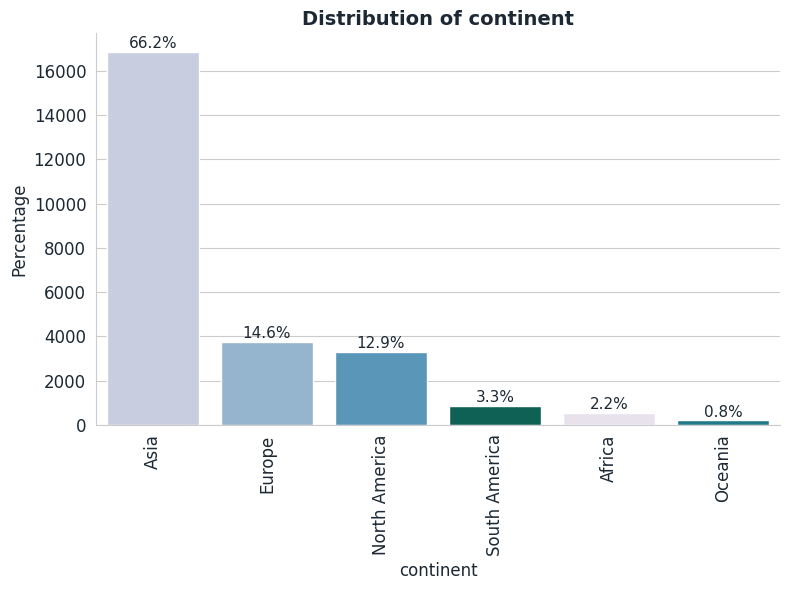

----------------------------------------------------------------------------------------------------
education_of_employee : 



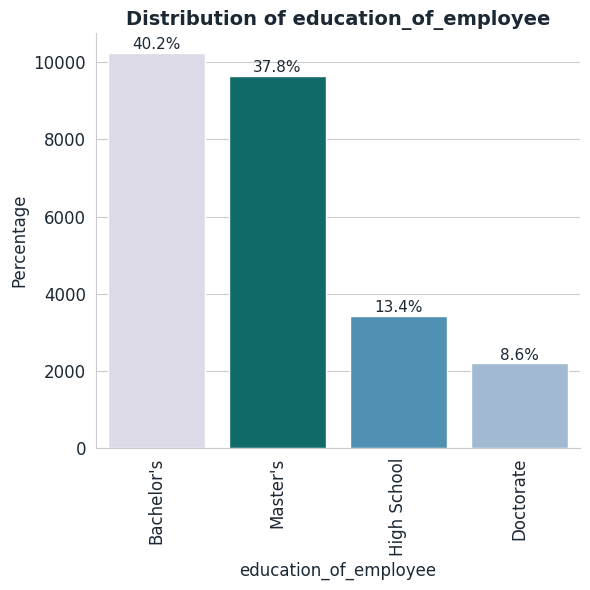

----------------------------------------------------------------------------------------------------
has_job_experience : 



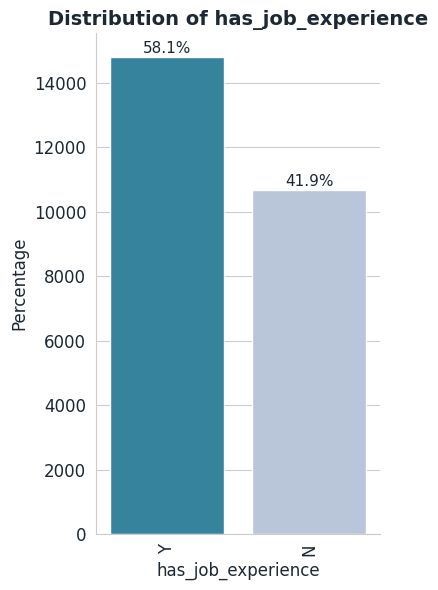

----------------------------------------------------------------------------------------------------
requires_job_training : 



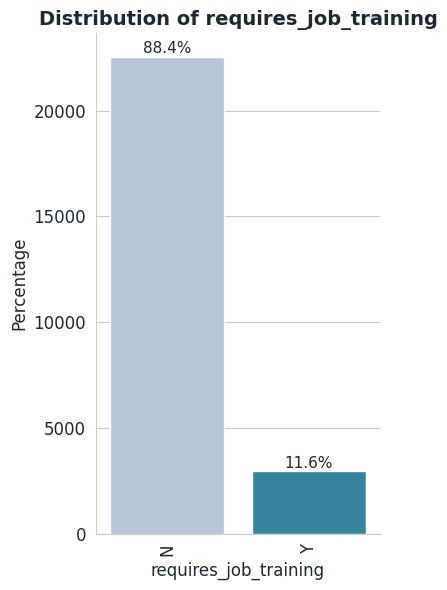

----------------------------------------------------------------------------------------------------
region_of_employment : 



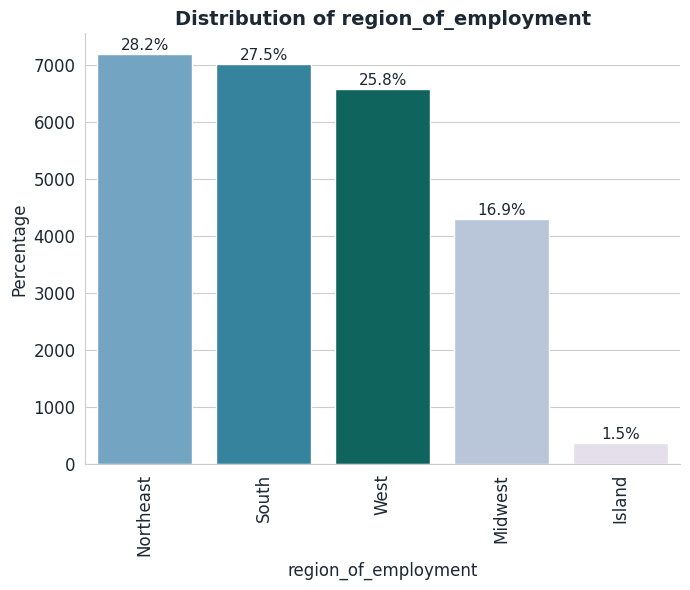

----------------------------------------------------------------------------------------------------
unit_of_wage : 



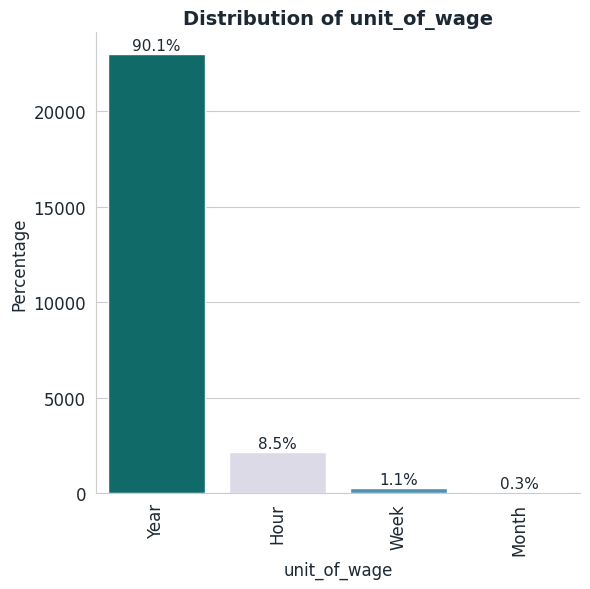

----------------------------------------------------------------------------------------------------
full_time_position : 



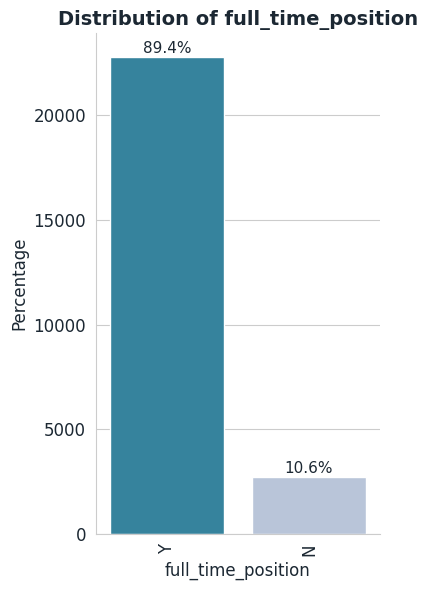

----------------------------------------------------------------------------------------------------
case_status : 



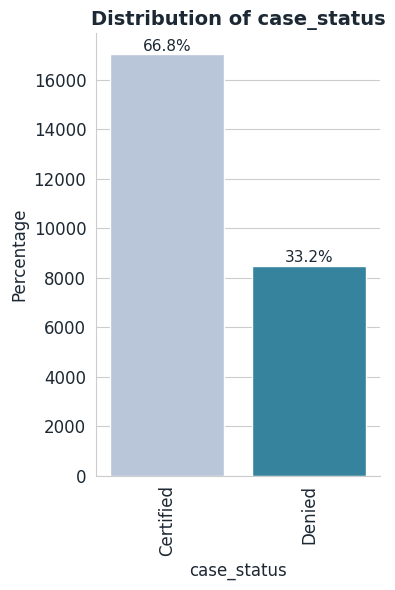

----------------------------------------------------------------------------------------------------


In [119]:
for col in obj_cols[1:]:
   print(col,":","\n")
   labeled_barplot(df, col, perc = True)
   print("-"*100)

###Observations on Categorical Distributions:

* `continent`: Asia dominates the dataset (66%), indicating strong regional concentration; other continents have marginal representation.

* `education_of_employee`: Most employees hold a Bachelor's or Master's degree (≈78%), reflecting a highly educated workforce.

* `has_job_experience`: Majority (58%) have prior job experience, showing a skilled labor base.

* `requires_job_training`: Most employees (88%) do not require job training, implying readiness for immediate deployment.

* `region_of_employment` : Employment is well distributed across Northeast, South, and West; minimal representation from Island region.

* `unit_of_wage`: Salaries are primarily annual (90%), confirming long-term employment arrangements.

* `full_time_position`: A high proportion (89%) hold full-time positions, indicating employment stability.

* `case_status`: Around two-thirds of applications are certified, though the 33% denial rate warrants further review of eligibility or documentation processes.

**Conclusion**:

The data suggests that the United States prioritizes the recruitment of highly qualified foreign professionals. Most foreign workers hold advanced degrees, have prior job experience, and require little to no additional training. This indicates that the U.S. labor market mainly attracts specialized talent to fill skill gaps in knowledge-intensive sectors


### Numerical features:

In [120]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

no_of_employees : 



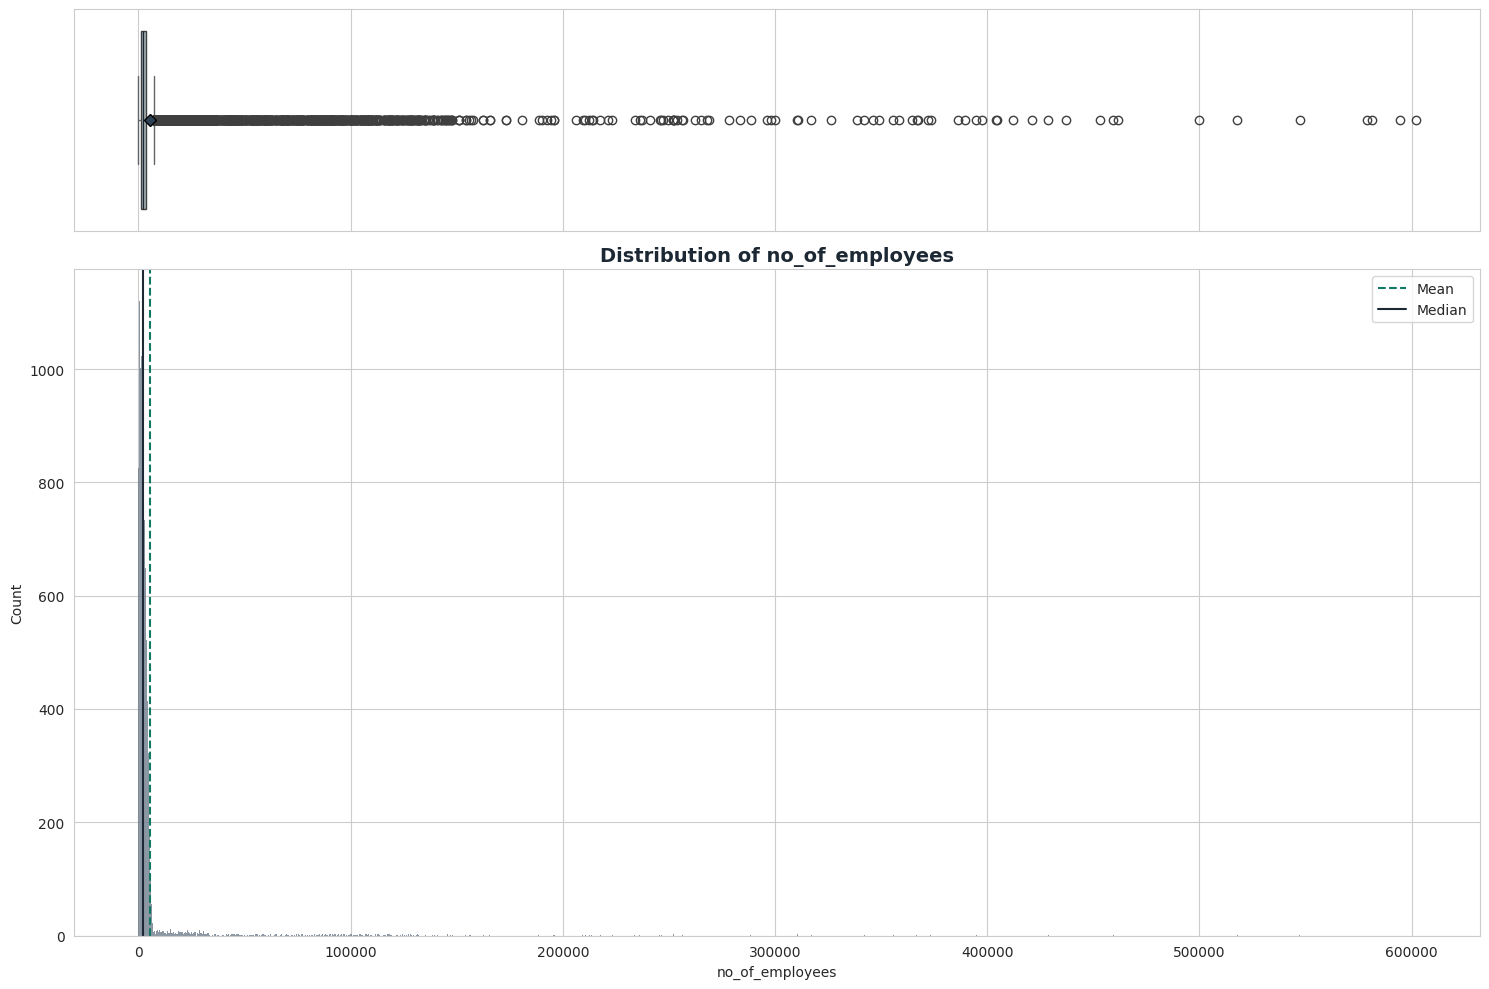

----------------------------------------------------------------------------------------------------
yr_of_estab : 



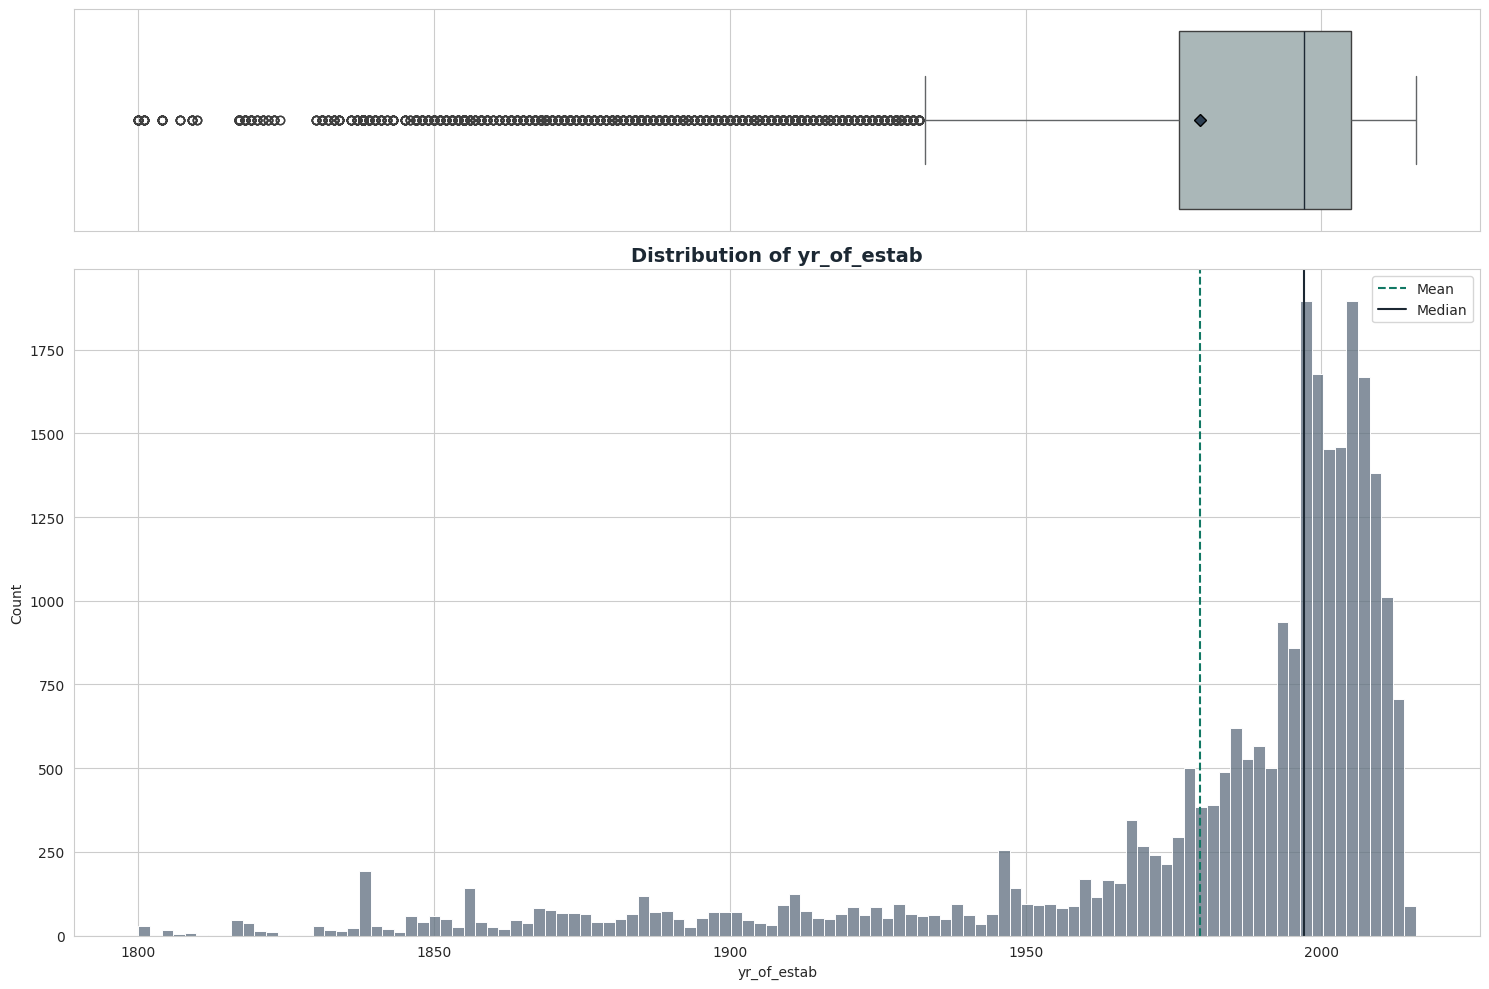

----------------------------------------------------------------------------------------------------
prevailing_wage : 



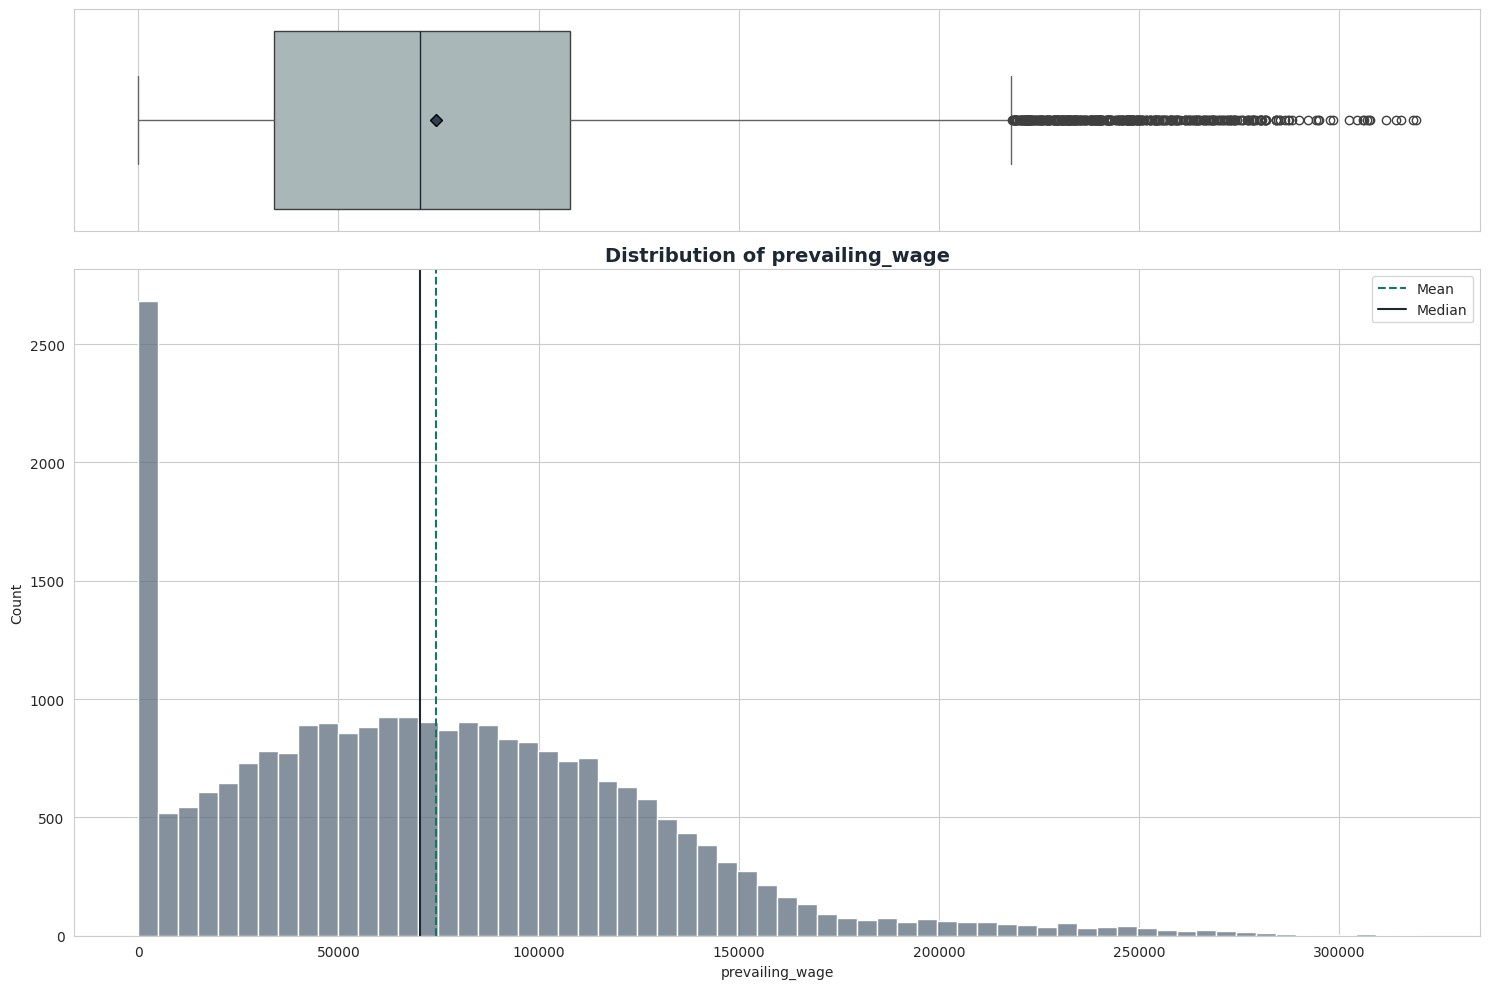

----------------------------------------------------------------------------------------------------


In [121]:
for col in num_cols:
  print(col,":","\n")
  histogram_boxplot(df, col)
  print("-"*100)

###Observations:
* Apparently there's a lot of work here to be done...

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# **Model Building**

# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


# **Model Comparison and Final Model Selection**

# **Actionable Insights and Recommendations**



*   



___

Backup Section

In [124]:
import shutil
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
# Define paths

path = r'/content/drive/MyDrive/Great_Learning/06_Ensemble_Techniques_Model_Tuning/W03_easy_visa'

src_file = os.path.join(path, "GACA_EasyVisaProject_FullCode.ipynb")
backup_dir = os.path.join(path, "/backup/")

# Ensure backup directory exists
os.makedirs(backup_dir, exist_ok=True)

# Create filename with timestamp to avoid overwrite
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
base_name = os.path.basename(src_file).replace(".ipynb", f"_{timestamp}.ipynb")
dst_file = os.path.join(backup_dir, base_name)

# Copy the file
shutil.copy2(src_file, dst_file)
print(f"Backup created: {dst_file}")

# Now export to HTML
!jupyter nbconvert --to html "/content/drive/MyDrive/Great_Learning/05_Sup_Learn_classification/project/GACA_SLC_DSBA_INNHotels_FullCode.ipynb"

Backup created: /backup/GACA_EasyVisaProject_FullCode_20251026_191718.ipynb
[NbConvertApp] Converting notebook /content/drive/MyDrive/Great_Learning/05_Sup_Learn_classification/project/GACA_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 58 image(s).
[NbConvertApp] Writing 5863425 bytes to /content/drive/MyDrive/Great_Learning/05_Sup_Learn_classification/project/GACA_SLC_DSBA_INNHotels_FullCode.html
